# Problemas 41, 42, 43 y 44
# 41)
Queremos una distribución espacial aleatoria de $N = 10000$ partículas en una esfera de radio $R = 1$ tal que la *cantidad de puntos por unidad de volumen* sigan una distribución <br>
### <center> $n(r) \sim r^\alpha$ ; $\alpha \in (-2,-1,0,1)$ </center>
¿Cómo lo conseguimos? <br> <br>
Como quiero puntos dentro de una esfera, utilizamos coordenadas esféricas. Además, definimos <br>

### <center> $n(r) = \frac{dN}{dV}$ ; $dV = r^2 dr \cdot sin(\theta) d\theta \cdot d\phi$ </center>
### <center> $dN = d(\int n(r) r^2 dr) \cdot d(cos(\theta)) \cdot d\phi$ </center>
Luego, como sólo podemos obtener números randoms de una distribución uniforme, le aplicamos la inversa de la función dentro de cada diferencial obtenido anteriormente, según la coordenada: <br> 
### <center> $\phi \sim U(0,2\pi)$ </center>
### <center> $\theta \sim arccos(U(-1,1))$ </center>
### <center> $n(r) \sim r^\alpha \Rightarrow r \sim (U(0,1))^{\frac{1}{\alpha + 3}}$ </center>

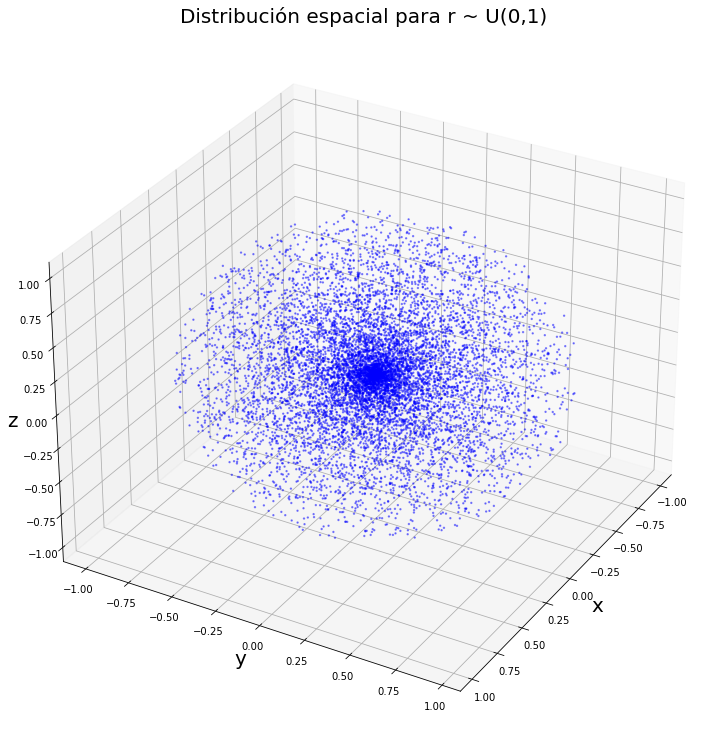

In [1]:
#Veamos:

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
from numpy import pi

n = 10000 #cantidad de puntos

phi = np.random.uniform(low=0,high=(2*np.pi),size=n) #áng acimutal para n part, en rads

x = np.random.uniform(low=-1,high=1,size=n) #variable unif que abarca el dom de arccos
theta = np.arccos(x) #áng que debería estar distrib unif en toda la esfera, en rads

x = np.random.uniform(low=0,high=1,size=n) #variable unif que abarca el dom de x^(a+3)
#sup alpha = -2
r = x

X = r*np.sin(theta)*np.cos(phi)
Y = r*np.sin(theta)*np.sin(phi)
Z = r*np.cos(theta)

#plot 3-D

fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection='3d')    
ax.scatter3D(X,Y,Z,s=2,color='b',alpha=0.4)
ax.view_init(elev=None, azim=30)
ax.set_title('Distribución espacial para r ~ U(0,1)',fontsize=20)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_zlabel('z',fontsize=20);

##### *Mucha concentración de pts en el centro*

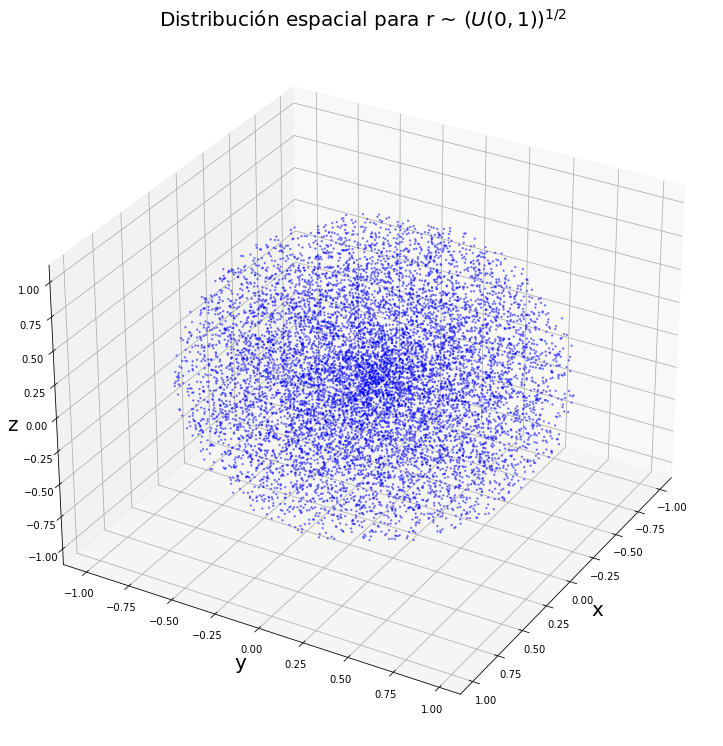

In [2]:
r = x**0.5

X = r*np.sin(theta)*np.cos(phi)
Y = r*np.sin(theta)*np.sin(phi)
Z = r*np.cos(theta)

#plot 3-D

fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection='3d')    
ax.scatter3D(X,Y,Z,s=2,color='b',alpha=0.4)
ax.view_init(elev=None, azim=30)
ax.set_title('Distribución espacial para r ~ $(U(0,1))^{1/2}$',fontsize=20)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_zlabel('z',fontsize=20);

##### *Todavía se nota cierta concentración de pts en el centro*

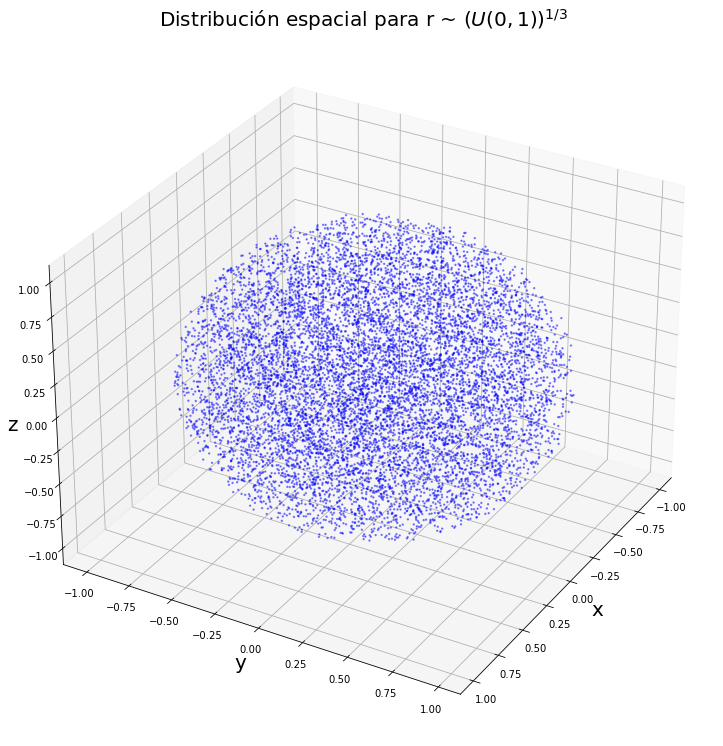

In [3]:
r = x**(1/3)

X = r*np.sin(theta)*np.cos(phi)
Y = r*np.sin(theta)*np.sin(phi)
Z = r*np.cos(theta)

#plot 3-D

fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection='3d')    
ax.scatter3D(X,Y,Z,s=2,color='b',alpha=0.4)
ax.view_init(elev=None, azim=30)
ax.set_title('Distribución espacial para r ~ $(U(0,1))^{1/3}$',fontsize=20)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_zlabel('z',fontsize=20);

##### *¡Parece que hay una densidad radial uniforme de pts!*

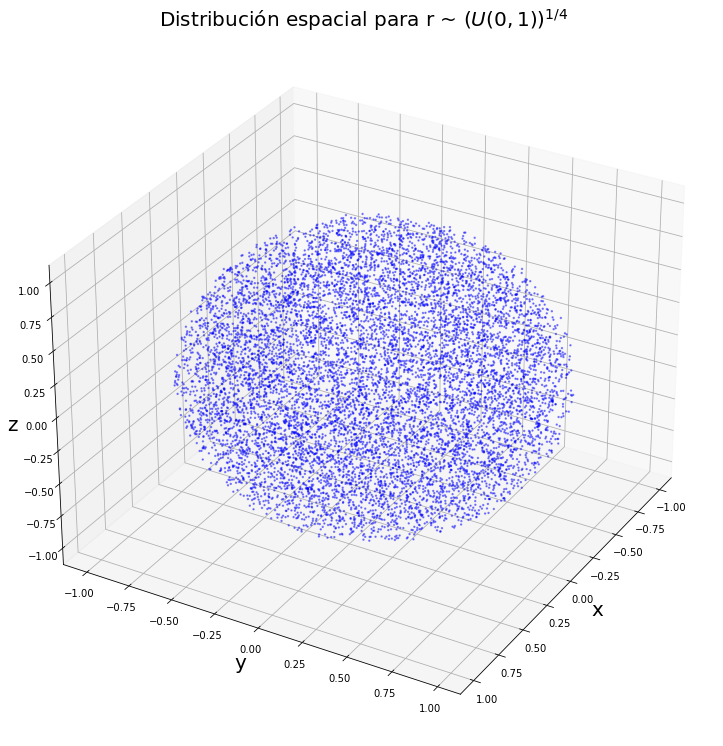

In [4]:
r = x**(1/4)

X = r*np.sin(theta)*np.cos(phi)
Y = r*np.sin(theta)*np.sin(phi)
Z = r*np.cos(theta)

#plot 3-D

fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection='3d')    
ax.scatter3D(X,Y,Z,s=2,color='b',alpha=0.4)
ax.view_init(elev=None, azim=30)
ax.set_title('Distribución espacial para r ~ $(U(0,1))^{1/4}$',fontsize=20)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_zlabel('z',fontsize=20);

##### *No se termina de apreciar mucho, pero deberíamos tener más pts por unidad de volumen en los bordwes que en el centro*
Probemos un caso donde $\alpha = 10$: 

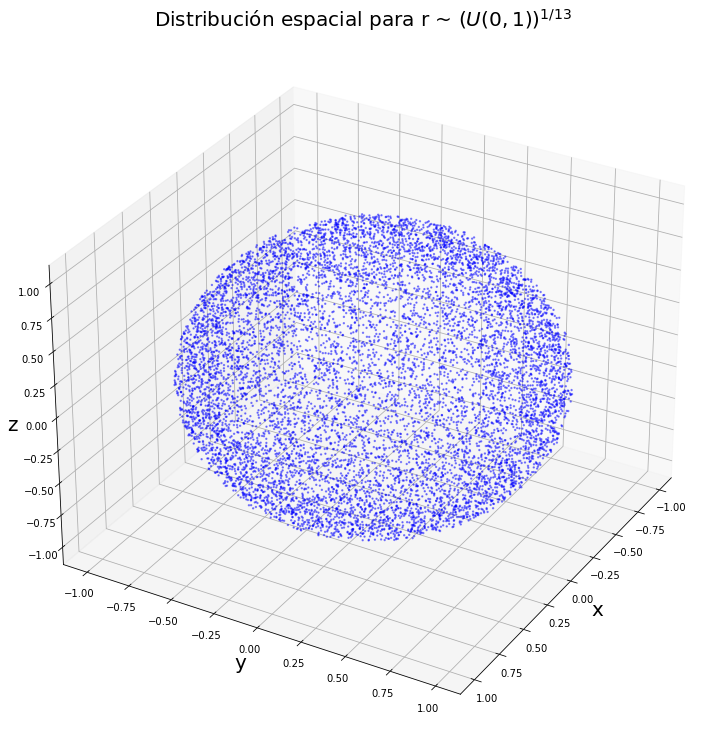

In [5]:
r = x**(1/13)

X = r*np.sin(theta)*np.cos(phi)
Y = r*np.sin(theta)*np.sin(phi)
Z = r*np.cos(theta)

#plot 3-D

fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection='3d')    
ax.scatter3D(X,Y,Z,s=2,color='b',alpha=0.4)
ax.view_init(elev=None, azim=30)
ax.set_title('Distribución espacial para r ~ $(U(0,1))^{1/13}$',fontsize=20)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_zlabel('z',fontsize=20);

##### *Ahora sí podemos apreciar que hay más pts en el borde que en el centro.*
## 42)
Ahora tengo una *densidad numérica **superficial*** <br>
### <center> $\Sigma_0 e^{-r/r_d} = n(r) = \frac{dN}{dS}$ ; $dS = r dr \cdot d\phi$ </center>
### <center> $dN = d(\int_0^{r} n(r') r' dr') \cdot d\phi$ </center>
Suponemos que $\Sigma_0 = r_d = 1$. Entonces, <br>
### <center> $\phi \sim U(0,2\pi)$ </center>
### <center> $n(r) \sim \sigma(r) \Rightarrow 1-e^{-r}(r+1) \sim U(0,1)$ </center>
¿Cómo resolvemos esta última ecuación? No podemos despejar $r$ por lo que haremos bisección: <br>
Pido un $y \sim U(0,1)$, y el $r$ correspondiente será <br>
### <center> $1-e^{-r}(r+1)-y = 0$ </center>
Veamos...

In [6]:
#Escribo la función bisección:

def f(x,y0): #Se come al "y0" ~ U(0,1)
    g = 1 - np.exp(-x)*(x+1) - y0
    return g

#Bisección:

def bisec(xl,xu,y0): #xl = xmin del bracket; xu = xmax del bracket
    
    i = 0 #contar el número de iteraciones
    e = abs(xu-xl) #error
        
    while e > 10**-6 and i < 1000: #el loop se corta cuando se llega a la precisión requerida o se pasa el número de iteraciones
    
        i += 1 #contando
        xm = 0.5*(xl+xu) #punto medio
        #print(xl,xm,xu,i) #para saber qué está haciendo
        if f(xl,y0)*f(xm,y0) < 0: #test para nuevo bracket
            xu = xm
        
        elif f(xl,y0)*f(xm,y0) == 0:
            print('La raíz de f(x) es',xm)
            e = 0
            break
        
        else:
            xl = xm
        
        e = abs(xu - xl) #test del error
        
    return xm

In [7]:
n = 10000 #cantidad de puntos

phi = np.random.uniform(low=0,high=(2*np.pi),size=n) #áng acimutal para n part, en rads
r = np.empty(n)

for i in range(n):
    y0 = np.random.uniform(low=0,high=1,size=1) #Tiro 1 random
    r[i] = bisec(0,15,y0) #Digo que no debe aparecer un pt a r > 15

X = r*np.cos(phi)
Y = r*np.sin(phi)
Z = np.zeros(n)

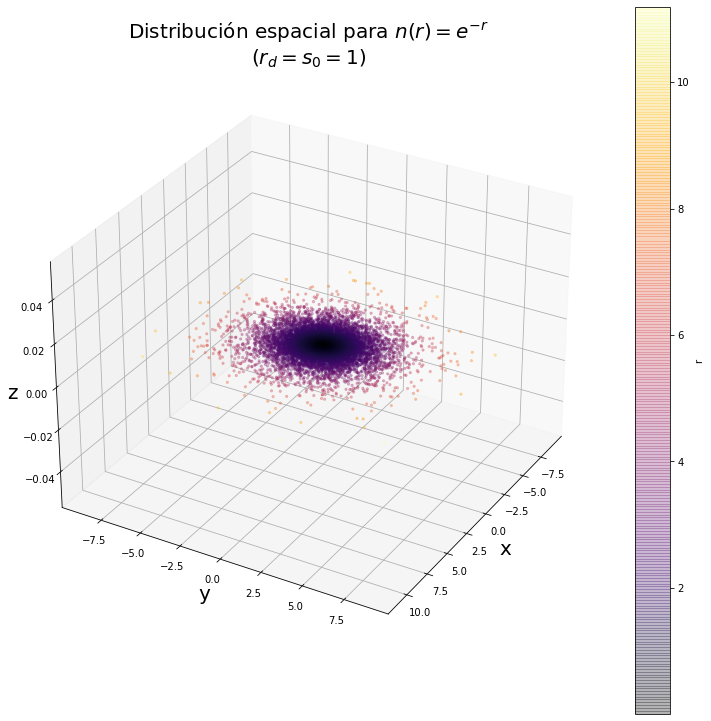

In [8]:
#plot 3-D

fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection='3d')    
plot = ax.scatter3D(X,Y,Z,s=5,c=r,cmap=plt.inferno(),alpha=0.3)
fig.colorbar(plot,ticks=None,label='r')
ax.view_init(elev=30, azim=30)
ax.set_title('Distribución espacial para $n(r) = e^{-r}$ \n($r_d = s_0 = 1$)',fontsize=20)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_zlabel('z',fontsize=20);

## 43)
Ahora, queremos graficar $n(r)$ en $30$ bines de igual ancho $(dr)$ o de igual cantidad de partículas $(dN)$, para los últimos 2 problemas (41) y 42) ). Veamos:

In [83]:
#Como sólo nos interesa r, tiremos sólo para esta coord: (copiamos y pegamos)

n = 10_000

def histR(r,n=n): #Bines de igual dr
    
    plt.figure(figsize=(13,10))
    plt.xlabel('$r$',size=20)
    plt.ylabel('Cantidad de partículas',size=20)
    plt.title(f'Distribución $n(r)$ de {n} partículas en \n30 bines de igual $dr$',size=20)
    plt.hist(r,bins=30,histtype='step',lw=2,color='k')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid(True)
    
    return

def histN(r,n=n): #Bines de igual dN
    
    r = np.sort(r) #acomodo de menor a mayor ¡Y sólo tengo que saltar de a dN espacios!
    
    dN = int(n//30) # ~ 333 
    R = np.empty(31) #Donde guardo las cosas para hacer el histograma/plot
    
    for i in range(len(R)):
        R[i] = r[i*dN]
        
        
    plt.figure(figsize=(13,10))
    plt.xlabel('$r$',size=20)
    plt.ylabel('Cantidad de partículas encerradas',size=20)
    plt.title(f'Distribución $n(r)$ acumulativa de {n} partículas en \n30 bines de igual $dN$',size=20)
    plt.scatter(R,[333*i for i in range(len(R))],color='k',s=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid(True)
        
    return

### Caso de densidad volumétrica $n(r) = r^{\alpha}$
### $\alpha = -2$

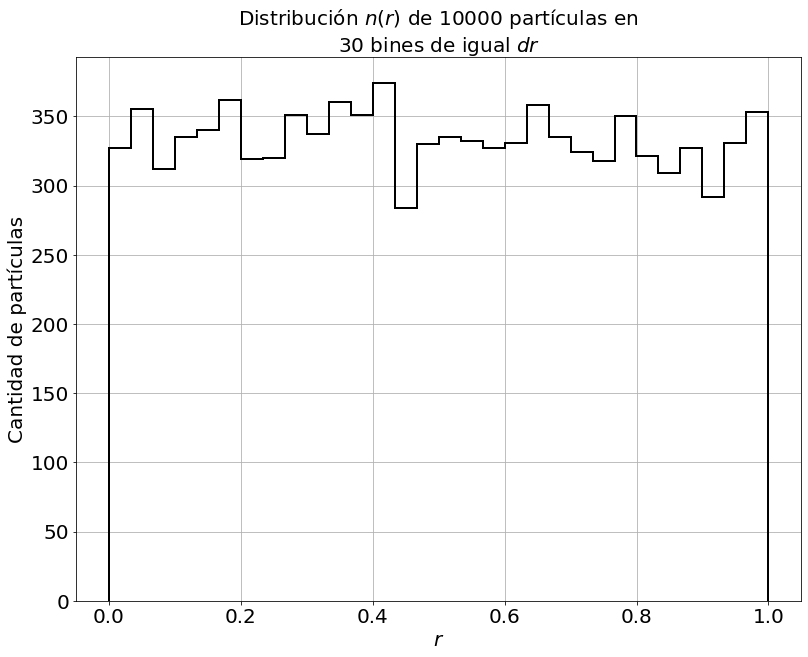

In [84]:
x = np.random.uniform(low=0,high=1,size=n) #variable unif que abarca el dom de x^(a+3)
#sup alpha = -2
r = x
histR(r)

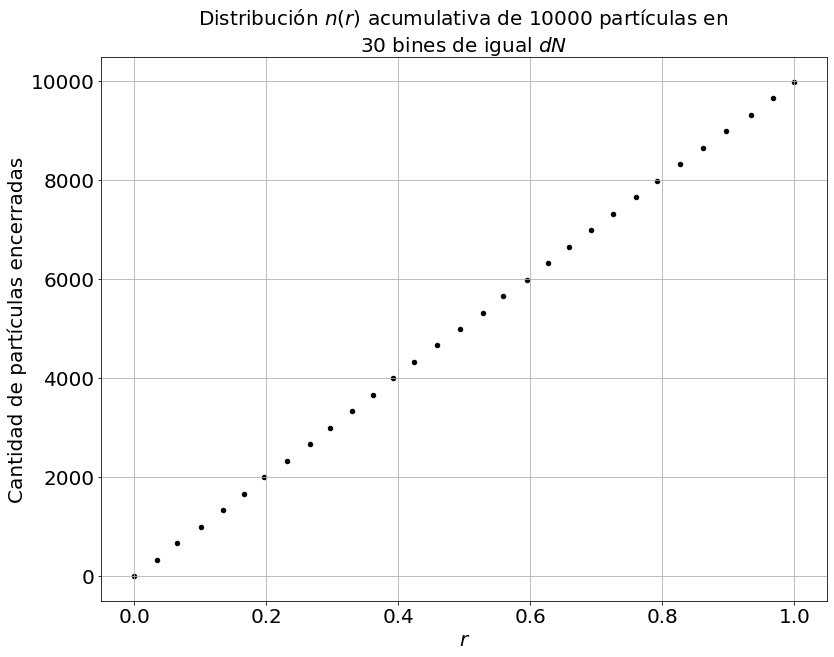

In [85]:
histN(r)

### $\alpha = -1$

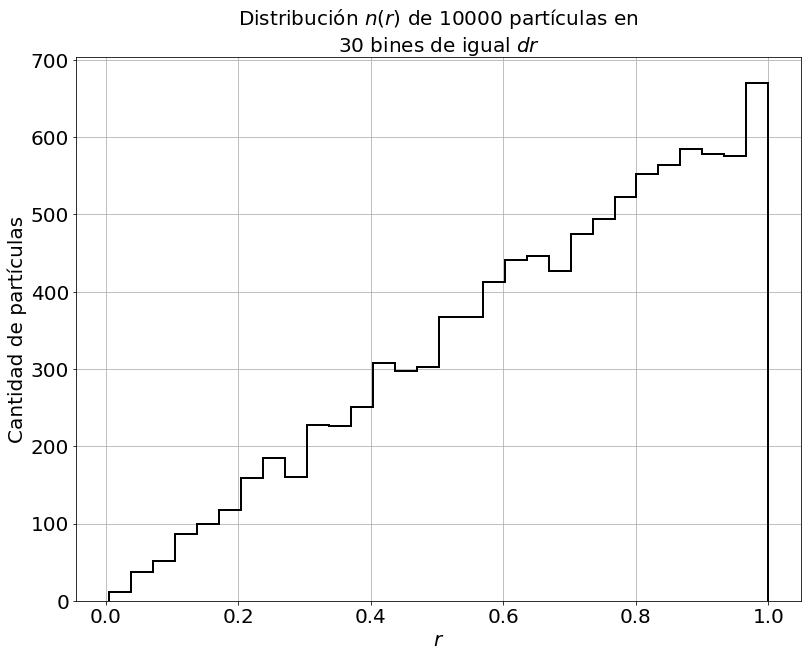

In [86]:
r = x**0.5
histR(r)

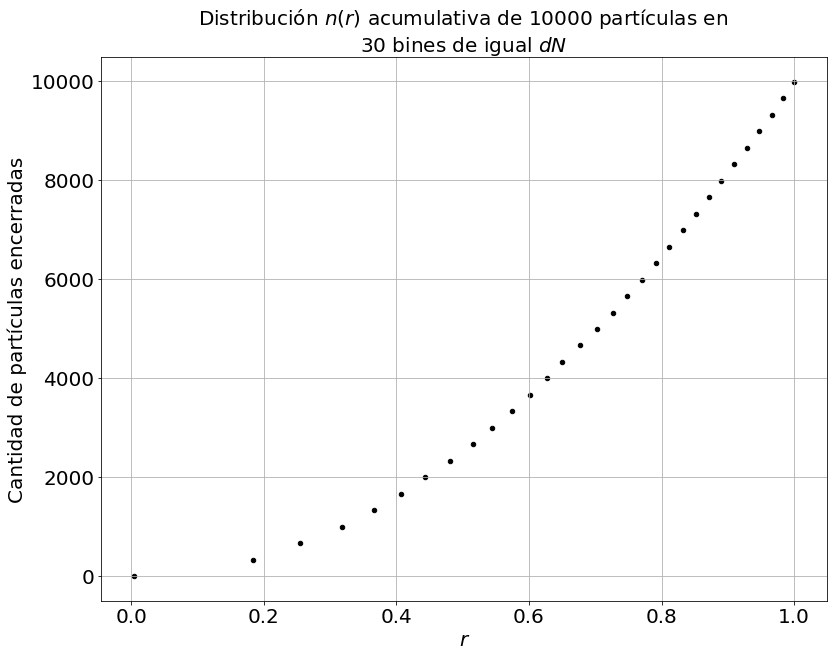

In [87]:
histN(r)

### $\alpha = 0$

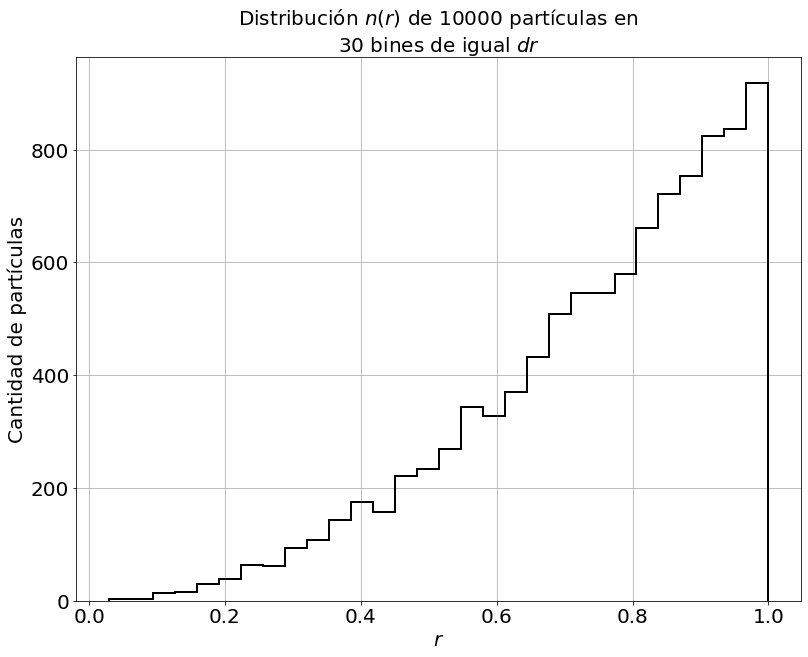

In [88]:
r = x**(1/3)
histR(r)

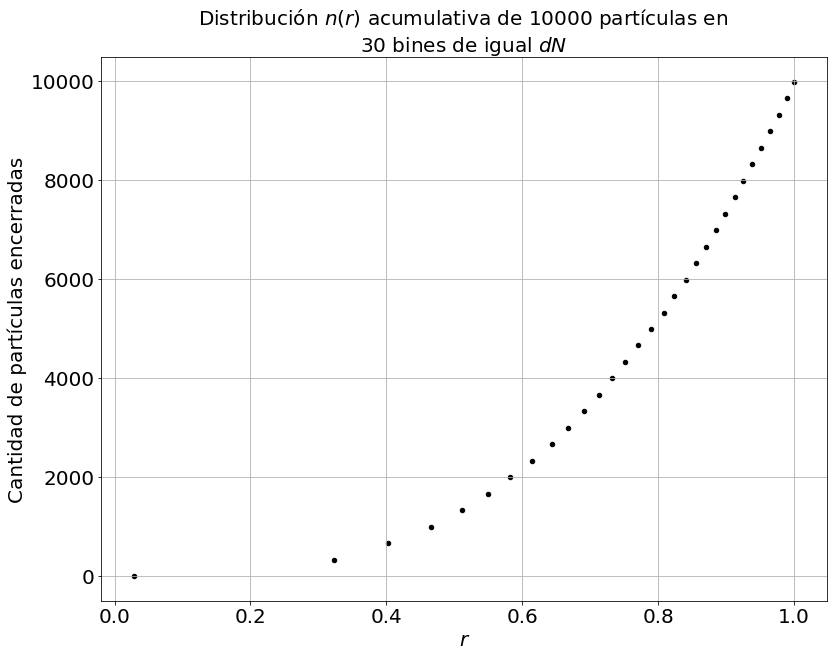

In [89]:
histN(r)

### $\alpha = 1$

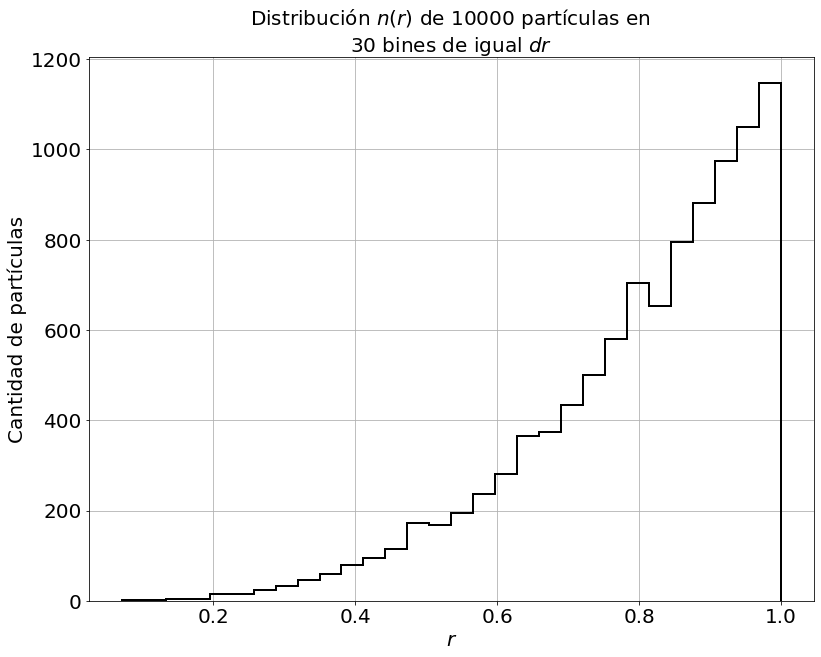

In [90]:
r = x**(1/4)
histR(r)

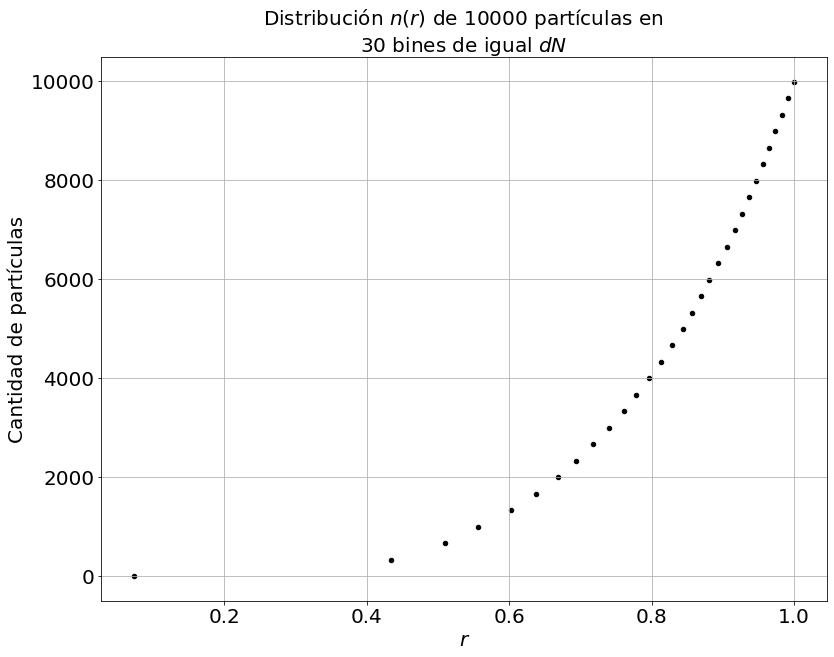

In [82]:
histN(r)

## 44)
Podemos pensar a un *random walk* de una partícula dentro de un cubo de densidad homogénea, interactuando sólo por choques elásticos, como un problema donde debemos escribir un *random walk* sin ninguna dirección privilegiada. Es decir, la probabilidad de chocar con una partícula (y que cambie su momento lineal) es la misma para todas las direcciones en cualquier punto del cubo. Lo que debo agregar es que no se escape del box donde están las otras partículas *(o que si se escapa, que no vuelva a cambiar su momento).* Veamos el cubo:

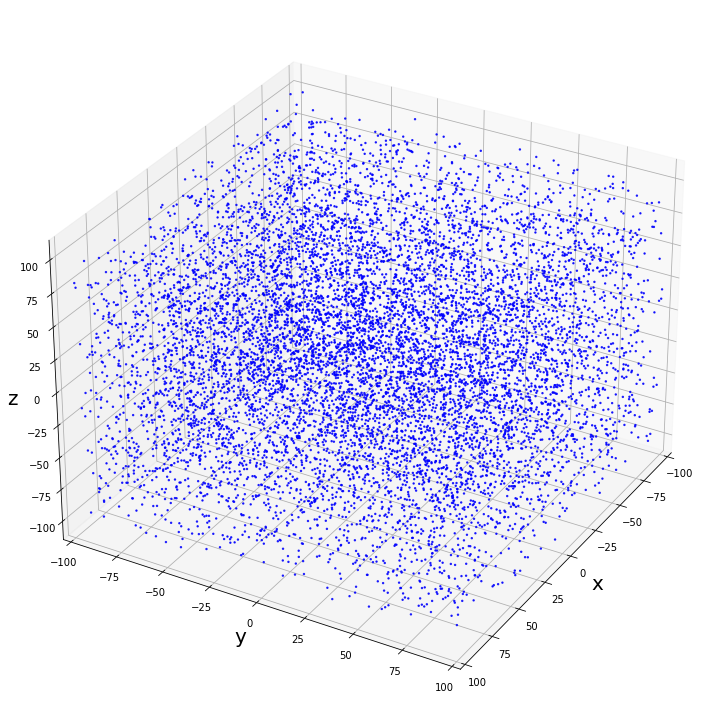

In [130]:
from mpl_toolkits import mplot3d

a = 100 #lado del cubo

n = 10000 #cant de puntos dentro del prisma

X = np.random.uniform(-a,a,n)
Y = np.random.uniform(-a,a,n)
Z = np.random.uniform(-a,a,n)

#plot 3-D

fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection='3d')    
ax.scatter3D(X, Y, Z,s=2,color='b',alpha=0.8)
plt.xlim(-a,a)
plt.ylim(-a,a)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_zlabel('z',fontsize=20)
ax.view_init(elev=None, azim=30);

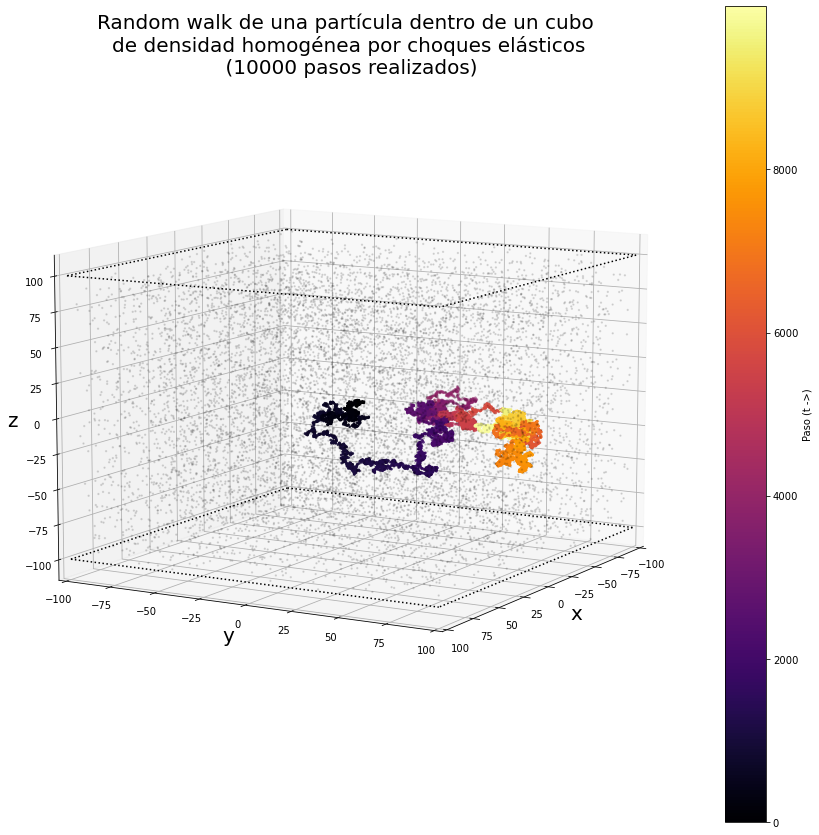

In [141]:
#Programemos la caminata:

m = 10000 #pasos

x = [0]
y = [0]
z = [0] #Partimos del origen

#Caminemos:

for i in range(m-1):
    if x[i] <= 100 and y[i] <= 100 and z[i] <= 100:
        step = np.random.uniform(-1,1,3)#Paso aleatorio
        x.append(x[i] + step[0]) #camino
        y.append(y[i] + step[1])
        z.append(z[i] + step[2])

    else:
        #print(f'La partícula se escapó del box en el paso {i}')
        x.append(x[i])
        y.append(y[i])
        z.append(z[i]) #Se "congela"

        break

t = np.arange(len(x))

#plot 3-D

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')    
plot = ax.scatter3D(x, y, z,s=3,c=t,cmap=plt.inferno())

ax.plot3D([-a,a],[-a,-a],[-a,-a],c='k',ls=':')
ax.plot3D([-a,a],[a,a],[-a,-a],c='k',ls=':')
ax.plot3D([-a,a],[-a,-a],[a,a],c='k',ls=':')
ax.plot3D([-a,a],[a,a],[a,a],c='k',ls=':')

ax.plot3D([-a,-a],[-a,a],[-a,-a],c='k',ls=':')
ax.plot3D([-a,-a],[-a,a],[a,a],c='k',ls=':')
ax.plot3D([a,a],[-a,a],[-a,-a],c='k',ls=':')
ax.plot3D([a,a],[-a,a],[a,a],c='k',ls=':')

A = plt.colorbar(plot,label='Paso (t ->)')
ax.set_title(f'Random walk de una partícula dentro de un cubo \nde densidad homogénea por choques elásticos\n ({len(x)} pasos realizados)',fontsize=20)

plt.xlim(-a,a)
plt.ylim(-a,a)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_zlabel('z',fontsize=20)
ax.view_init(elev=10, azim=30)

ax.scatter3D(X, Y, Z,s=2,color='k',alpha=0.1);